Data sourced from here: https://physionet.org/content/rr-interval-healthy-subjects/1.0.0/

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the file
rr_intervals = pd.read_csv(file_path, header=None, names=['RR'])

# Convert RR intervals into cumulative time (assuming each value is in milliseconds)
rr_intervals['Time'] = rr_intervals['RR'].cumsum() / 1000  # Convert to seconds

# Plotting the time series
plt.figure(figsize=(12, 6))
plt.plot(rr_intervals['Time'], rr_intervals['RR'])
plt.title('R-R Intervals Time Series')
plt.xlabel('Time (seconds)')
plt.ylabel('R-R Interval (milliseconds)')
plt.grid(True)
plt.show()



In [6]:
import os
import pandas as pd
folder_path = '/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/data-hrv-physionet/'

file_names = ['000','003','005','006','007','008','009','010','013']

for file_name in file_names:
    df = pd.read_csv(folder_path + file_name + '.txt', header=None, names=['RR'])
    print(file_name, df.count())


000 RR    80441
dtype: int64
003 RR    108150
dtype: int64
005 RR    97925
dtype: int64
006 RR    89624
dtype: int64
007 RR    57333
dtype: int64
008 RR    98217
dtype: int64
009 RR    67263
dtype: int64
010 RR    82080
dtype: int64
013 RR    111521
dtype: int64


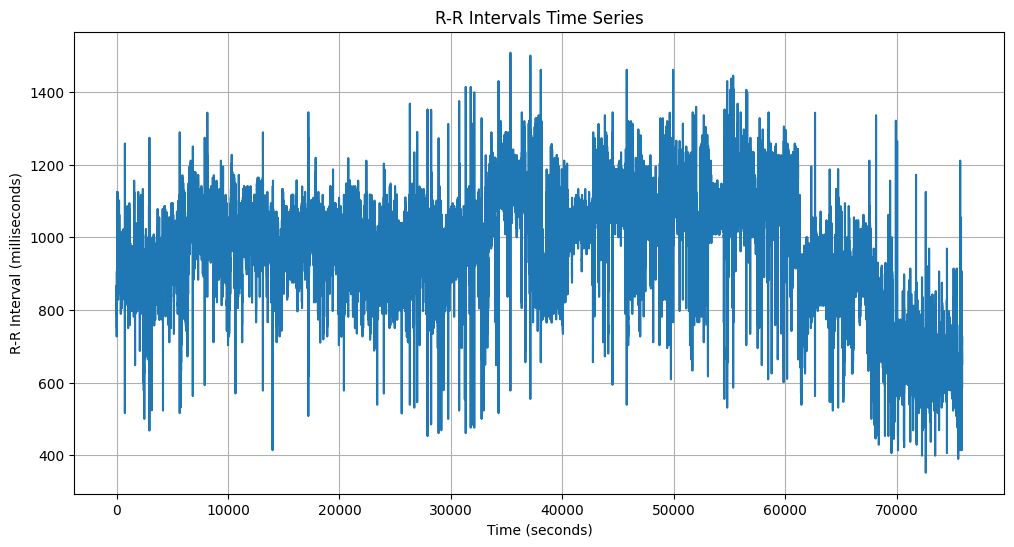

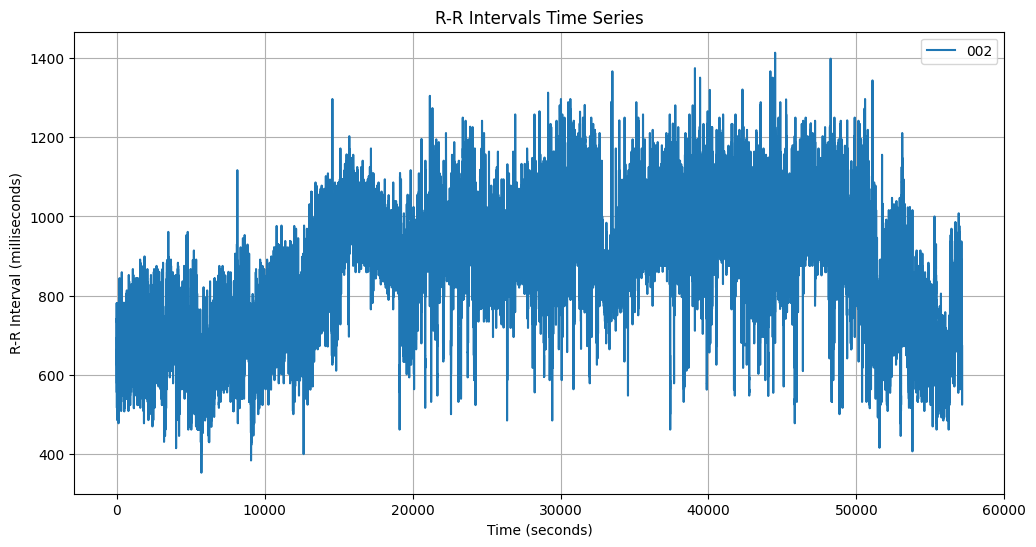

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Specify the folder and files
folder_path = '/content/drive/My Drive/Colab Notebooks/4_Influencing_Signal/data-hrv-physionet'
file_names = ['000', '002']

for file_name in file_names:
    file_path = os.path.join(folder_path, file_name + '.txt')

    # Step 3: Read the file
    rr_intervals = pd.read_csv(file_path, header=None, names=['RR'])
    rr_intervals['Time'] = rr_intervals['RR'].cumsum() / 1000 # To seconds conversion

    # Step 4: Visualize the data
    plt.figure(figsize=(12, 6))
    plt.plot(rr_intervals['Time'], rr_intervals['RR'], label=f'{file_name}')
    plt.title('R-R Intervals Time Series')
    plt.xlabel('Time (seconds)')
    plt.ylabel('R-R Interval (milliseconds)')
    plt.grid(True)

plt.legend()
plt.show()


In [32]:
df = pd.read_csv(folder_path + '/patient-info.csv')
df.columns=['Filename', 'Age', 'Gender']

df = df[df['Age'] >= 18]
df['RR records'] = ''
df['KNN prediction'] = ''
df['RF prediction'] = ''
df['XGB prediction'] = ''

df.drop(['Age', 'Gender'], axis=1, inplace=True)

df.head(20)

,Filename,RR records,KNN prediction,RF prediction,XGB prediction
0,0,,,,
2,3,,,,
3,5,,,,
4,6,,,,
5,7,,,,
6,8,,,,
7,9,,,,
8,10,,,,
10,12,,,,
11,13,,,,


In [33]:
print(df.to_latex(index=False))

\begin{tabular}{rllll}
\toprule
 Filename & RR records & KNN prediction & RF prediction & XGB prediction \\
\midrule
        0 &            &                &               &                \\
        3 &            &                &               &                \\
        5 &            &                &               &                \\
        6 &            &                &               &                \\
        7 &            &                &               &                \\
        8 &            &                &               &                \\
        9 &            &                &               &                \\
       10 &            &                &               &                \\
       12 &            &                &               &                \\
       13 &            &                &               &                \\
\bottomrule
\end{tabular}



<ipython-input-33-ab74ab32f31b>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False))
